In [2]:
import wandb
import os
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

In [3]:
api = wandb.Api()

entity = "kainmueller-lab"
project = "dinov2_plankton"


['system.gpu.0.gpu', 'system.gpu.1.gpu']


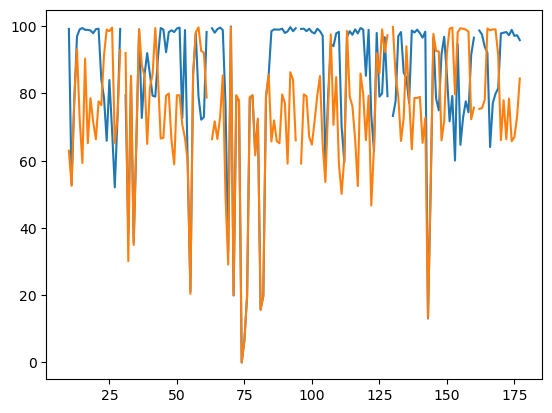

['system.gpu.3.gpu', 'system.gpu.7.gpu', 'system.gpu.0.gpu', 'system.gpu.1.gpu', 'system.gpu.4.gpu', 'system.gpu.5.gpu', 'system.gpu.2.gpu', 'system.gpu.6.gpu']


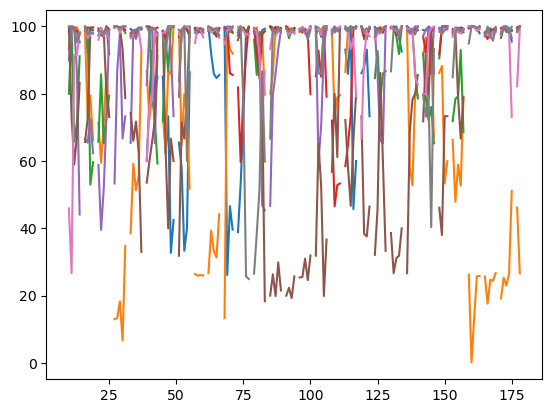

['system.gpu.9.gpu', 'system.gpu.3.gpu', 'system.gpu.7.gpu', 'system.gpu.0.gpu', 'system.gpu.8.gpu', 'system.gpu.1.gpu', 'system.gpu.4.gpu', 'system.gpu.5.gpu', 'system.gpu.2.gpu', 'system.gpu.6.gpu']


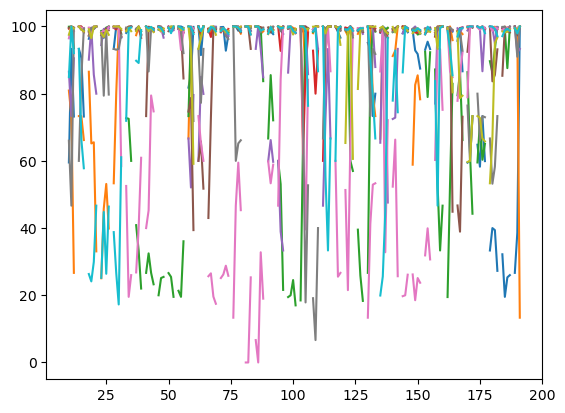

['system.gpu.3.gpu', 'system.gpu.0.gpu', 'system.gpu.1.gpu', 'system.gpu.4.gpu', 'system.gpu.5.gpu', 'system.gpu.2.gpu']


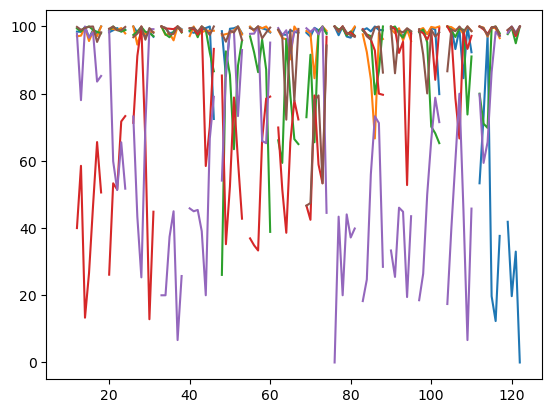

['system.gpu.0.gpu']


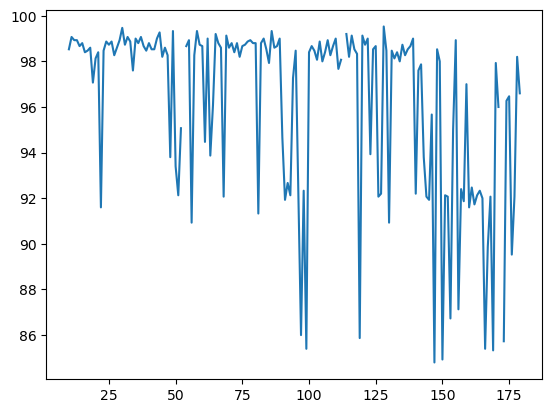

['system.gpu.3.gpu', 'system.gpu.0.gpu', 'system.gpu.1.gpu', 'system.gpu.2.gpu']


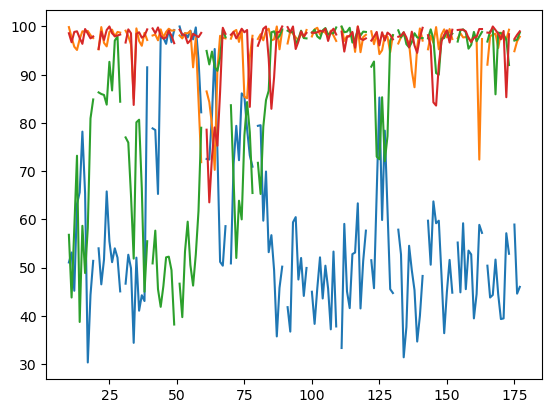

In [4]:
run_ids = [
    "ktfsf1ga",
    "9khsj7ue",
    "1zcpte2a",
    "ym8r6tp9",
    "6h202il0",
    "dsth5jn6",
    "n43spqkr",
]

run_ids = [
    "e6zsmdm7",
    "dizqjfg9",
    "s576no8g",
    "u72xyncp",
    "pkkfx5rv",
    "fl54rgpv",
]

gpu_usage_entries = OrderedDict()

for run_id in run_ids:
    run = api.run(os.path.join(entity, project, run_id))
    system_metrics = run.history(stream="events")

    sys_gpu_cols = [
        k
        for k in system_metrics.columns
        if "system.gpu." in k and k.endswith(".gpu") and (not "process" in k)
    ]
    print(sys_gpu_cols)
    nb_gpus = len(sys_gpu_cols)

    plt.plot(system_metrics[sys_gpu_cols][10:])
    plt.show()
    mean_per_gpu = system_metrics[sys_gpu_cols][10:].mean()
    mean, std = (
        np.mean(mean_per_gpu),
        np.std(mean_per_gpu),
    )
    gpu_usage_entries[nb_gpus] = (mean, std, run_id)

In [5]:
gpu_usage_entries

OrderedDict([(2, (79.10374233128834, 4.629754601226992, 'e6zsmdm7')),
             (8, (88.2704375, 9.413903071323405, 'dizqjfg9')),
             (10, (89.16741549295774, 8.290728311277148, 's576no8g')),
             (6, (86.4480412371134, 11.670513014487717, 'u72xyncp')),
             (1, (96.28790419161678, 0.0, 'pkkfx5rv')),
             (4, (83.94157894736841, 15.530738284694536, 'fl54rgpv'))])

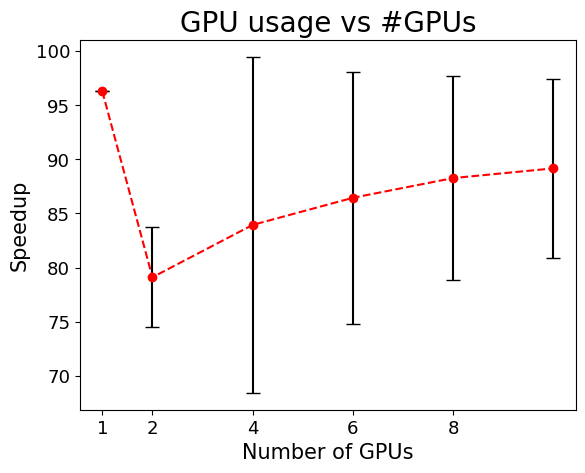

In [6]:
import matplotlib.pyplot as plt

means = [v[0] for v in gpu_usage_entries.values()]
stds = [v[1] for v in gpu_usage_entries.values()]

lists = sorted(gpu_usage_entries.items())
x, y = zip(*lists)

font_big = {"size": 20}
font_small = {"size": 15}
v_small = 13

f, a = plt.subplots()
a.set_xlabel("Number of GPUs", fontdict=font_small)
a.set_ylabel("Speedup", fontdict=font_small)
a.set_xticks(np.concatenate([[min(x)], np.arange(min(x) + 1, max(x), 2)]))

a.tick_params(axis="both", which="major", labelsize=v_small)
a.set_title("GPU usage vs #GPUs", fontdict=font_big)
a.errorbar(x, [el[0] for el in y], yerr=[el[1] for el in y], color='red', ls='--', marker='o',capsize=5, ecolor="black")
plt.savefig("./plots/scaling_plot_cputest.png", dpi=200)
plt.show()